# 02 Q-agent

#### 👉Let's use Q-learning to train a smart taxi driver.

#### 👉Needless to say, do not grab a taxi driven by a Random Driver.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
import gym
env = gym.make("Taxi-v3").env

## Q-agent 🤖🧠

In [3]:
from src.q_agent import QAgent

# hyper-parameters
# RL problems are full of these hyper-parameters.
# For the moment, trust me when I set these values.
# We will later play with these and see how they impact learning.
alpha = 0.1
gamma = 0.6

agent = QAgent(env, alpha, gamma)

## Training loop 🎡

In [5]:
import random
from IPython.display import clear_output
from tqdm import tqdm

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1

n_episodes = 1000

# For plotting metrics
timesteps_per_episode = []
penalties_per_episode = []


for i in tqdm(range(0, n_episodes)):
    
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        
        if random.uniform(0, 1) < epsilon:
            # Explore action space
            action = env.action_space.sample()
        else:
            # Exploit learned values
            action = agent.get_action(state)
        
        next_state, reward, done, info = env.step(action) 
        
        agent.update_parameters(state, action, reward, next_state)
        
        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 287.97it/s]


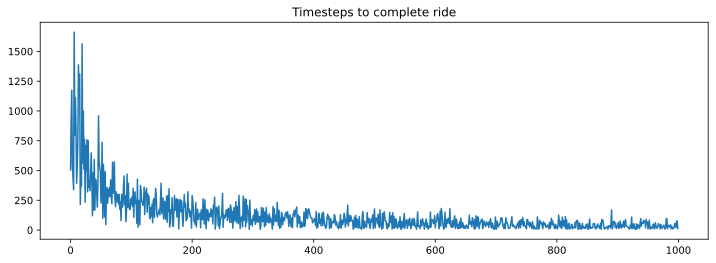

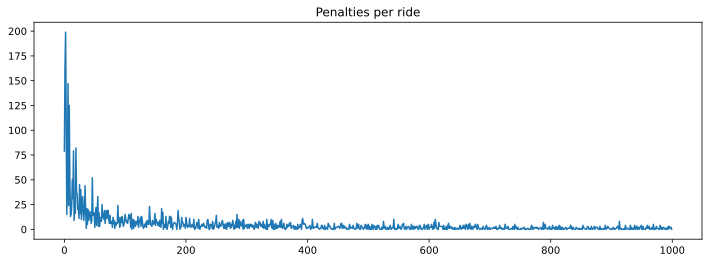

In [10]:
import pandas as pd

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind='line')
plt.show()

## Let's average results over a few runs to get smoother curves